In [1]:
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import pickle
from operator import itemgetter

In [2]:
# list all saved files in directory
directory_template = 'data/box/'
list_of_pkl = glob(directory_template + '*.pkl')

In [3]:
def calc_ac(x,n,r):
    left = np.roll(x,r,axis=1)
    right = np.roll(x,-r,axis=1)
    up = np.roll(x,r,axis=0)
    down = np.roll(x,-r,axis=0)
    left_up=np.roll(np.roll(x,r,axis=1),1,axis=0)
    left_down = np.roll(np.roll(x,r,axis=1),-r,axis=0)
    right_up = np.roll(np.roll(x,-r,axis=1),r,axis=0)
    right_down = np.roll(np.roll(x,-r,axis=1),-r,axis=0)
    
    e = (1/n) * (1/16) * sum(sum(x * (left + right + up + down + left_down + left_up + right_down + right_up)))
    return e

In [4]:
list_of_ac_all_box = []
for each_box in list_of_pkl:
    # open each file and convert to numpy array
    with open(each_box,'rb') as f:
        box = np.array(pickle.load(f))

    for i in range(1,len(box)):
        if calc_ac(box,150,i) <= 0.37:
            list_of_ac_all_box.append(i)
            break

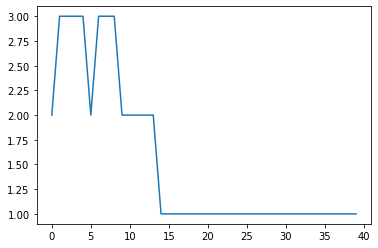

In [5]:
plt.plot(list_of_ac_all_box)
plt.show()